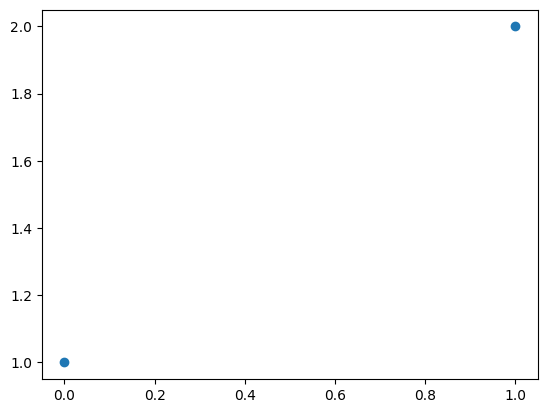

In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seismic-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_forward
import seis_nn
import seis_test
plt.scatter([0,1],[1,2])
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

Mismatch to hosts: 3.544453883175856e-05
adjoint 5.346471963069144e-18 4.9042632427831433e-05
diff 1.574739655544795e-13 1.658886008067652e-07
Mismatch to hosts: 1.5741465383079042e-05
adjoint 8.592302216947623e-18 0.0001352831488805387
diff 1.1770732250346666e-13 1.4481413612063529e-07
8.23042934313816e-16 1.0896616942090986e-11
All tests passed!


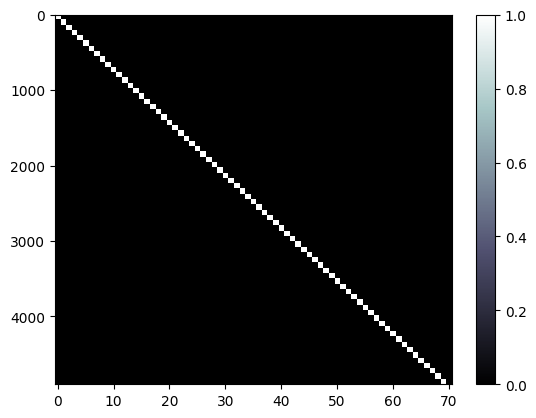

In [2]:
import seis_test
seis_test.run_all_tests()

In [5]:
importlib.reload(kgs)
data=kgs.load_all_train_data(validation_only=True)
len(data)

5000

In [6]:
importlib.reload(seis_nn)
model = seis_nn.make_default_pretrained()

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\bartley_unet2d_convnext_seed1_epochbest_FT.pth
Replacing all activations with GELU...
Replacing all norms with InstanceNorm...
Replacing forward functions...
Loading:  F:/seismic/models/brendan\bartley_unet2d_convnext_seed2_epochbest_FT.pth
Replacing all activations with GELU...
Replacing all norms with InstanceNorm...
Replacing forward functions...
n_models: 2


In [7]:
model.read_cache=False
data_out = model.infer(data)

  0%|                                                                                           | 0/17 [00:02<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 1.10 GiB. GPU 0 has a total capacity of 11.99 GiB of which 0 bytes is free. Of the allocated memory 2.44 GiB is allocated by PyTorch, and 1.37 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
kgs.score_metric(data_out);
del data_out

In [ ]:
# import cupy as cp
# for i_base in range(10):
#     for ii in 500*i_base+np.arange(1):
#         data_out[ii].velocity.load_to_memory()
#         print(ii, data_out[ii].family, cp.mean(cp.abs(data_out[ii].velocity.data-data_out[ii].velocity_guess.data)), (data_out[ii].velocity.data-data_out[ii].velocity_guess.data)[0,0], 
#              (data_out[ii].velocity.data-data_out[ii].velocity_guess.data)[-1,-1])
#         plt.figure();plt.imshow(cp.asnumpy(data_out[ii].velocity.data));plt.colorbar()
#         plt.figure();plt.imshow(cp.asnumpy(data_out[ii].velocity_guess.data));plt.colorbar()
#         plt.figure();plt.imshow(cp.asnumpy(data_out[ii].velocity.data-data_out[ii].velocity_guess.data));plt.colorbar()        
#         plt.pause(0.0001)

In [ ]:
importlib.reload(kgs)
importlib.reload(seis_nn)
data = kgs.load_all_test_data()
print(len(data))
model = seis_nn.make_default_pretrained()
data_out = model.infer(data)

In [9]:
kgs.dill_save(kgs.temp_dir + 'baseline.pickle', data_out)

In [11]:
data_out = kgs.dill_load(kgs.temp_dir + 'baseline.pickle')

In [12]:
importlib.reload(kgs)
kgs.write_submission_file(data_out)